In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize= (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

In [5]:
reeses = cv2.imread("D:\\YEDEK\\Belgeler\\WS\\Python\\Computer Vision Course\Computer-Vision-with-Python\\Computer-Vision-with-Python\\DATA\\reeses_puffs.png", 0)

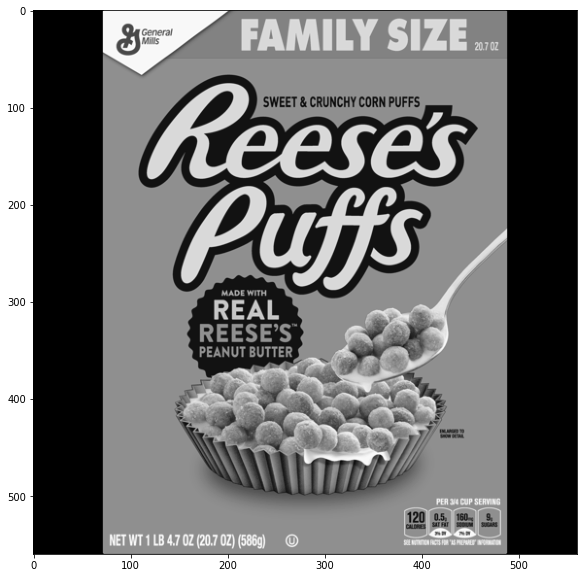

In [6]:
display(reeses)

In [7]:
cereals = cv2.imread("D:\\YEDEK\\Belgeler\\WS\\Python\\Computer Vision Course\Computer-Vision-with-Python\\Computer-Vision-with-Python\\DATA\\many_cereals.jpg", 0)

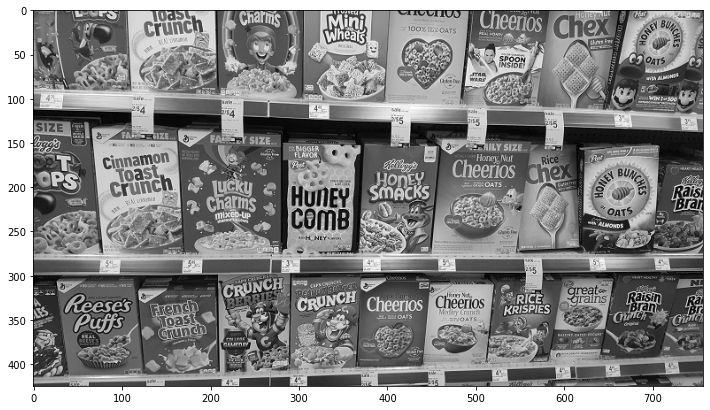

In [8]:
display(cereals)

In [9]:
#THREE FEATURE MATCHING METHODS
#1 BRUTE FORCE DETECTORS FOR ORB DESCRIPTORS 
orb = cv2.ORB_create() #Detection object detects features

In [10]:
#We run the detection object on two images
keypoints1, descriptors1 = orb.detectAndCompute(reeses, None)
keypoints2, descriptors2 = orb.detectAndCompute(cereals, None)

In [11]:
bruteForceMatching = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True) #Setting up brute force matcher

In [12]:
matches = bruteForceMatching.match(descriptors1, descriptors2) #we match the two images with bfm
matches #matches containes array of objects

(<DMatch 00000234E2A32FB0>,
 <DMatch 00000234E2A32F30>,
 <DMatch 00000234E2A71950>,
 <DMatch 00000234E2CAD410>,
 <DMatch 00000234E2CAD530>,
 <DMatch 00000234E2CADCF0>,
 <DMatch 00000234DFDA48F0>,
 <DMatch 00000234E2A66D70>,
 <DMatch 00000234E2A66AB0>,
 <DMatch 00000234E2A66C50>,
 <DMatch 00000234E2A66C90>,
 <DMatch 00000234E29FACB0>,
 <DMatch 00000234E29FA670>,
 <DMatch 00000234E29FAB50>,
 <DMatch 00000234E29FAA30>,
 <DMatch 00000234E29FA110>,
 <DMatch 00000234E29FA390>,
 <DMatch 00000234E29FA570>,
 <DMatch 00000234E29FAC30>,
 <DMatch 00000234E29FA190>,
 <DMatch 00000234E29FA490>,
 <DMatch 00000234E29FAC50>,
 <DMatch 00000234E29FAB70>,
 <DMatch 00000234E29FA3B0>,
 <DMatch 00000234E2A7F550>,
 <DMatch 00000234E2A7F570>,
 <DMatch 00000234E2A7F590>,
 <DMatch 00000234E2A7F5B0>,
 <DMatch 00000234E2A7F5D0>,
 <DMatch 00000234E2A7F5F0>,
 <DMatch 00000234E2A7F610>,
 <DMatch 00000234E2A7F630>,
 <DMatch 00000234E2A7F650>,
 <DMatch 00000234E2A7F670>,
 <DMatch 00000234E2A7F690>,
 <DMatch 00000234E2A

In [13]:

single_match = matches[0]
single_match

<DMatch 00000234E2A32FB0>

In [14]:
#single_match object contains various variables distance can be obseved here
single_match.distance
#distance parameter determinces how good of a match it is 

56.0

In [15]:
matches = sorted(matches, key = lambda x:x.distance) # here we sort the matches in distance

In [16]:
len(matches) #num of matches

139

In [17]:
#drawing matches 
reeses_matches = cv2.drawMatches(reeses, keypoints1, cereals, keypoints2, matches, None, flags = 2)

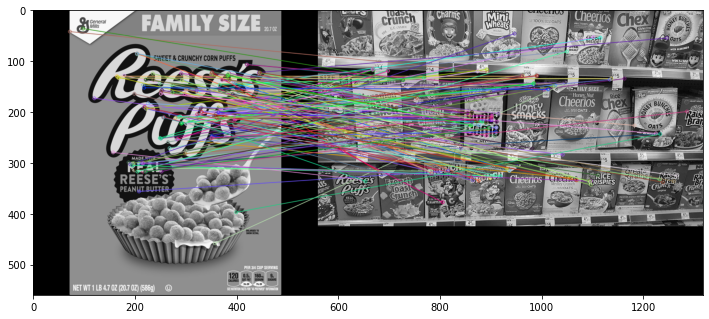

In [18]:
display(reeses_matches)

In [22]:
#SCALE INVARIANT FEATURE TRANSFORM - SIFT
sift = cv2.SIFT_create()

In [25]:
keypoints11, descriptors11 = sift.detectAndCompute(reeses, None)
keypoints22, descriptors22 = sift.detectAndCompute(cereals, None)

In [26]:
bruteForceMatching2 = cv2.BFMatcher()

In [28]:
knnmatches = bruteForceMatching2.knnMatch(descriptors11, descriptors22, k = 2)

In [32]:
knnmatches
#knnmatch we group matches in pairs (k=2)

((<DMatch 00000234E2F1C670>, <DMatch 00000234E2F1CE30>),
 (<DMatch 00000234E22E47F0>, <DMatch 00000234E22E47D0>),
 (<DMatch 00000234E22E48B0>, <DMatch 00000234E22E4890>),
 (<DMatch 00000234E22E4850>, <DMatch 00000234E22E4910>),
 (<DMatch 00000234E22E4810>, <DMatch 00000234E22E4950>),
 (<DMatch 00000234E22E4930>, <DMatch 00000234E22E4970>),
 (<DMatch 00000234E22E4990>, <DMatch 00000234E22E49B0>),
 (<DMatch 00000234E22E49D0>, <DMatch 00000234E22E49F0>),
 (<DMatch 00000234E22E4A10>, <DMatch 00000234E22E4A30>),
 (<DMatch 00000234E22E4A50>, <DMatch 00000234E22E4A70>),
 (<DMatch 00000234E22E4A90>, <DMatch 00000234E22E4AB0>),
 (<DMatch 00000234E22E4AD0>, <DMatch 00000234E22E4AF0>),
 (<DMatch 00000234E22E4B10>, <DMatch 00000234E22E4B30>),
 (<DMatch 00000234E22E4B50>, <DMatch 00000234E22E4B70>),
 (<DMatch 00000234E22E4B90>, <DMatch 00000234E22E4BB0>),
 (<DMatch 00000234E22E4BD0>, <DMatch 00000234E22E4BF0>),
 (<DMatch 00000234E22E4C10>, <DMatch 00000234E22E4C30>),
 (<DMatch 00000234E22E4C50>, <D

In [60]:
#we check if pair of matches' distance are close to each other if they are not they are not its not a good feature
goodMatches = []

# Here we check if first matches' distance is smaller than x% of second matches' distance. if true its a good match
# This is called RATIO MATCHING
for knnmatch1, knnmatch2 in knnmatches:
    if knnmatch1.distance < 0.50 * knnmatch2.distance:
        goodMatches.append([knnmatch1])

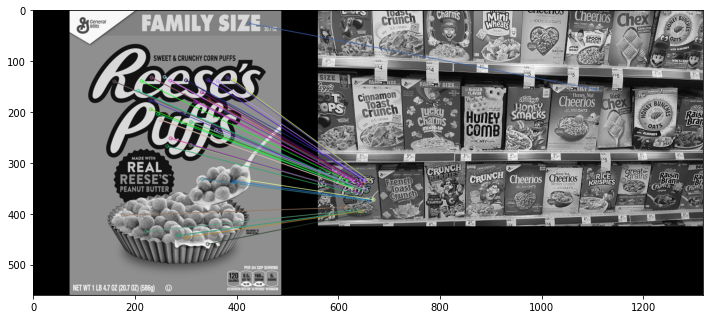

In [61]:
sift_matches = cv2.drawMatchesKnn(reeses, keypoints11, cereals, keypoints22, goodMatches, None, flags = 2)
display(sift_matches)

In [71]:
sift2 = cv2.SIFT_create()

In [72]:
keypoints111, descriptors111 = sift2.detectAndCompute(reeses, None)
keypoints222, descriptors222 = sift2.detectAndCompute(cereals, None)

In [73]:
#FLANN - FAST LIBRARY FOR APPROXIMATE NEAREST NEIGHBORS
#This approach is much faster than brute force match
#It does not find the best matches but the generally good matches

FLANN_INDEX_KDTREE = 0
index_param = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)


In [74]:
flann = cv2.FlannBasedMatcher(index_param, search_params)
flannknnmatches = flann.knnMatch(descriptors111, descriptors222, k = 2)

In [75]:
fkm_mask = [[0,0] for i in range(len(flannknnmatches))]

In [76]:
# goodMatchesFlann = []
# for flannknnmatch1, flannknnmatch2 in flannknnmatches:
#     if flannknnmatch1.distance < 0.50 * flannknnmatch2.distance:
#         goodMatchesFlann.append([flannknnmatch1])

for i, (flannknnmatch1, flannknnmatch2) in enumerate(flannknnmatches):
    if flannknnmatch1.distance < 0.50 * flannknnmatch2.distance:
        fkm_mask[i] = [1, 0]

In [79]:
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = fkm_mask,
                   flags = 0)

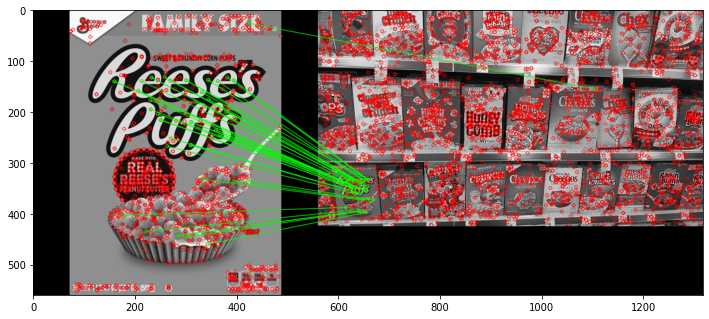

In [80]:
#flann_matches = cv2.drawMatchesKnn(reeses, keypoints111, cereals, keypoints222, goodMatchesFlann, None, flags  = 2)
flann_matches = cv2.drawMatchesKnn(reeses, keypoints111, cereals, keypoints222, flannknnmatches, None, **draw_params)
display(flann_matches)